# Bristish Airways Task 2
**Explore and prepare the dataset**
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

**Train a machine learning model**
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

**Evaluate model and present findings**
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

## Explore and Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'whitegrid', context='notebook')

In [2]:
# Read the data
bookings = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Our data contains information about bookings and the target variable is a binary variable `booking_complete` 1 for complete and 0 for not complete.

There is no NA values in this dataset.

In [4]:
bookings['booking_complete'].value_counts(normalize=True)

0    0.85044
1    0.14956
Name: booking_complete, dtype: float64

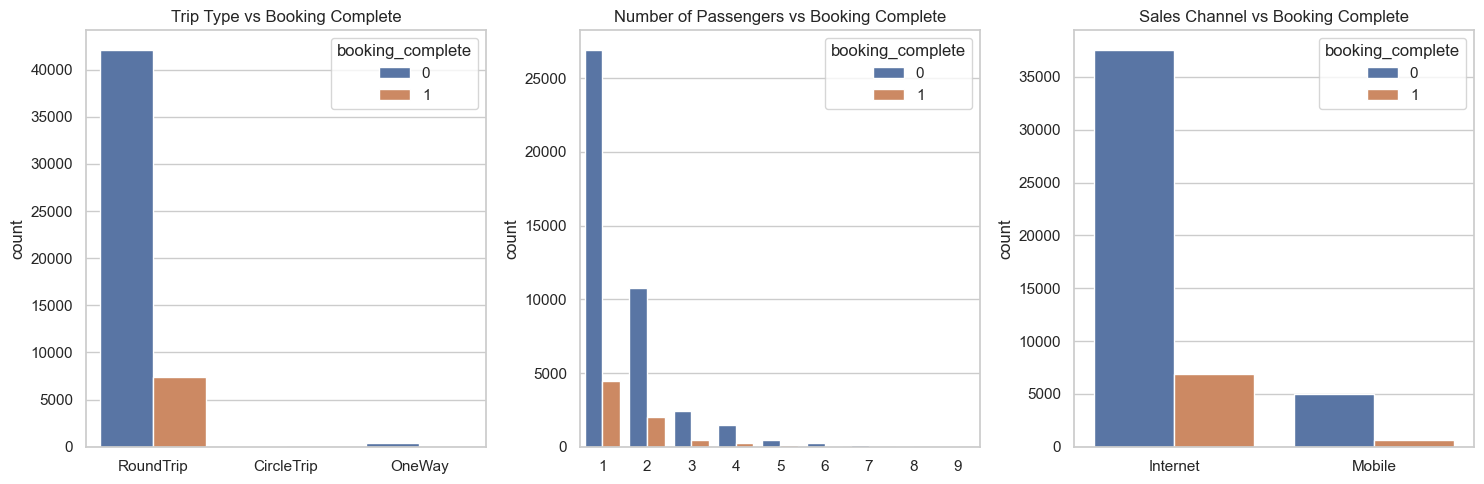

In [5]:
# Categorical Variables
fig, ax = plt.subplots(1, 3, figsize=(15, 5))


sns.countplot(data=bookings, x='trip_type', hue='booking_complete', ax=ax[0])
ax[0].set_title('Trip Type vs Booking Complete')
ax[0].set_xlabel('')

sns.countplot(data=bookings, x='num_passengers', hue='booking_complete', ax=ax[1])
ax[1].set_title('Number of Passengers vs Booking Complete')
ax[1].set_xlabel('')

sns.countplot(data=bookings, x='sales_channel', hue='booking_complete', ax=ax[2])
ax[2].set_title('Sales Channel vs Booking Complete')
ax[2].set_xlabel('')

plt.tight_layout()
plt.show()

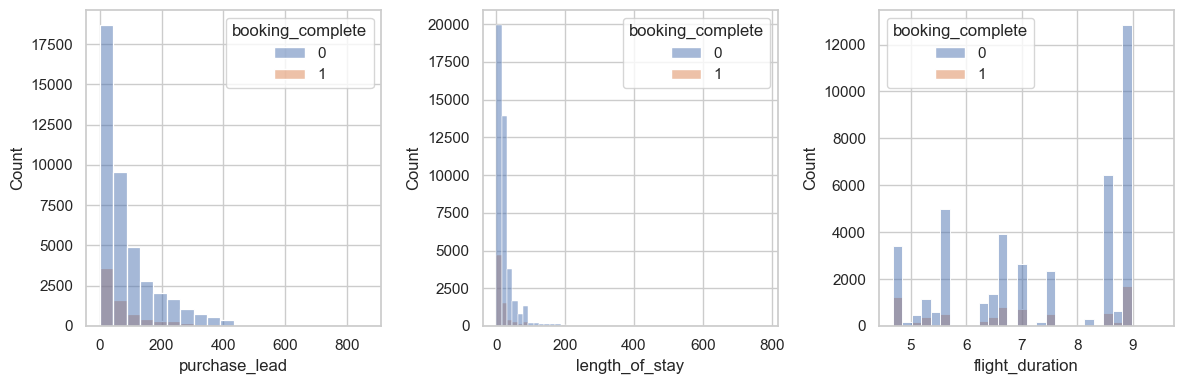

In [6]:
# Continuous variables
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=bookings, x='purchase_lead', hue='booking_complete', bins=20, ax=ax[0])
sns.histplot(data=bookings, x='length_of_stay', hue='booking_complete', bins=50, ax=ax[1])
sns.histplot(data=bookings, x='flight_duration', hue='booking_complete', ax=ax[2])
plt.tight_layout()
plt.show()


Doesn't seem to be any relationships between these variables to `booking_complete`

In [7]:
bookings.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0


<AxesSubplot: xlabel='flight_day', ylabel='count'>

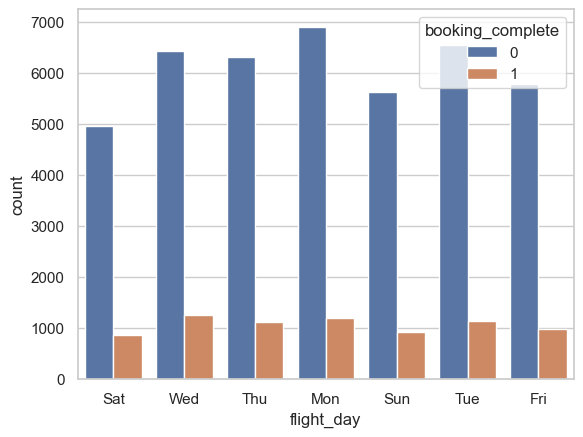

In [8]:
# Date and hour Variables
sns.countplot(data=bookings, x='flight_day', hue='booking_complete')

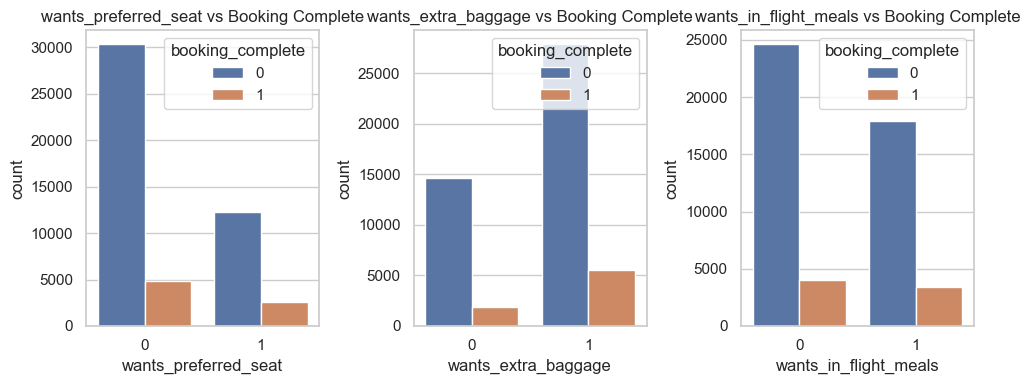

In [9]:
# Binary Variables
binary_cols = ['wants_preferred_seat', 'wants_extra_baggage', 'wants_in_flight_meals']
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i in range(3):
    sns.countplot(data=bookings, x=binary_cols[i], hue='booking_complete', ax=ax[i])
    ax[i].set_title(f'{binary_cols[i]} vs Booking Complete')
    
plt.tight_layout()

In [10]:
bookings['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [11]:
bookings[bookings['booking_complete'] == 1]['booking_origin'].value_counts(normalize=True).head()

Malaysia     0.330035
Australia    0.120353
China        0.092806
Indonesia    0.082241
Japan        0.063921
Name: booking_origin, dtype: float64

Top 5 countries with highest completion rate are Malaysia, Australia, China, Indonesia and Japan.

## Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [13]:
# Numerical encoding
encoder = OrdinalEncoder()

bookings[['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']] = encoder.fit_transform(
                                                                                    bookings[['sales_channel', 
                                                                                              'trip_type', 'flight_day', 'route', 
                                                                                              'booking_origin']])

encoder.categories_

[array(['Internet', 'Mobile'], dtype=object),
 array(['CircleTrip', 'OneWay', 'RoundTrip'], dtype=object),
 array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object),
 array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
        'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
        'AORKIX', 'AORKTM', 'AORMEL', 'AORPER', 'AORPUS', 'BBIMEL',
        'BBIOOL', 'BBIPER', 'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH',
        'BDOICN', 'BDOIKA', 'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK',
        'BDOPER', 'BDOPUS', 'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOWUH',
        'BDOXIY', 'BKICKG', 'BKICTS', 'BKICTU', 'BKIDEL', 'BKIHND',
        'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL', 'BKIMRU', 'BKIOOL',
        'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG', 'BKISYD', 'BKIXIY',
        'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD', 'BOMMEL', 'BOMOOL',
        'BOMPER', 'BOMSYD', 'BTJJED', 'BTUCKG', 'BTUICN', 'BTUPER',
        'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH', 'BWNIKA',
    

In [14]:
bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0.0,2.0,262,19,7,2.0,0.0,61.0,1,0,0,5.52,0
1,1,0.0,2.0,112,20,3,2.0,0.0,61.0,0,0,0,5.52,0
2,2,0.0,2.0,243,22,17,6.0,0.0,36.0,1,1,0,5.52,0
3,1,0.0,2.0,96,31,4,2.0,0.0,61.0,0,0,1,5.52,0
4,2,0.0,2.0,68,22,15,6.0,0.0,36.0,1,0,1,5.52,0


### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X = bookings.drop('booking_complete', axis=1)
y = bookings['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 13), (10000, 13), (40000,), (10000,))

## Train a Predictive Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [57]:
# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [67]:
def plot_confusion_matrix(model, X_test, y_test, ax=None):
    cf = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cf, annot=True, fmt='d', cmap='viridis', linewidths=0.5, annot_kws={'size': 16}, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title('Confusion Matrix')

def plot_feature_importance(model, X, ax=None):
    if model.__class__.__name__ == 'CatBoostClassifier':
        feature_importance = model.get_feature_importance()
    else:
        feature_importance = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    #plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='importance', y='feature',ax=ax)
    ax.set_title('Feature Importance')
    

Model: RandomForestClassifier
Training Score: 0.9998970648785366
Testing Score: 0.8312
Cross Validation Score: 0.8930217263436513



Model: DecisionTreeClassifier
Training Score: 0.9999117698958885
Testing Score: 0.7688
Cross Validation Score: 0.8478332151182654



Model: CatBoostClassifier
Training Score: 0.9144903240985824
Testing Score: 0.8469
Cross Validation Score: 0.8766113337254614





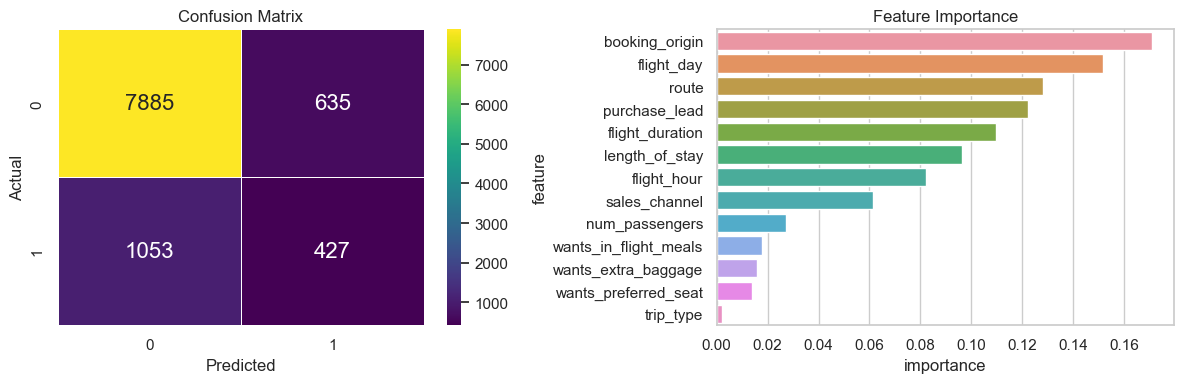

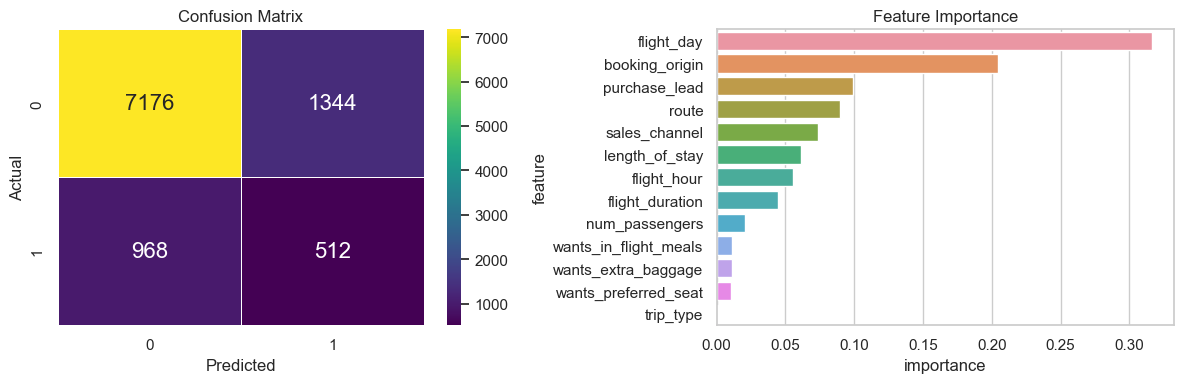

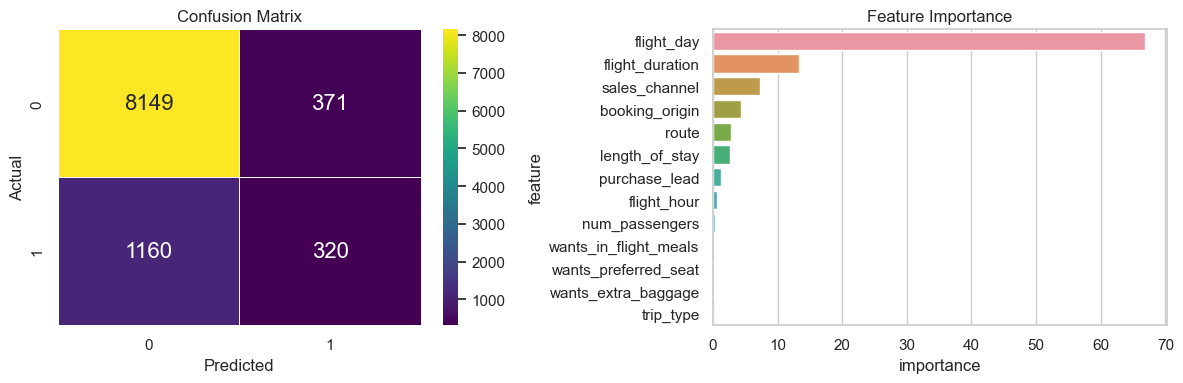

In [70]:
models = [RandomForestClassifier(n_estimators=100, random_state=42), DecisionTreeClassifier(random_state=42), CatBoostClassifier(verbose=0)]

for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    print(f'Model: {model.__class__.__name__}')
    print('Training Score:', model.score(X_train_resampled, y_train_resampled))
    print('Testing Score:', model.score(X_test, y_test))
    print('Cross Validation Score:', cross_val_score(model, X_train_resampled, y_train_resampled, cv=5).mean())
    print('\n\n')